<a href="https://colab.research.google.com/github/ukf-matusklestinec/Strojovy-preklad-DP/blob/main/Predspracovanie_dat_Trenovanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KORPUSY
# https://opus.nlpl.eu/Europarl/en&sk/v7/Europarl



# https://github.com/google/sentencepiece - SentencePiece
# https://opennmt.net/OpenNMT-tf/configuration.html - dokument√°cia pre config

In [5]:
!pip install sentencepiece
!pip3 install OpenNMT-py
!pip install langdetect

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 262.8/262.8 kB 5.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35.9/35.9 MB 39.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.7/56.7 kB 8.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.0/17.0 MB 59.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 106.3/106.3 kB 15.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.4/3.4 MB 109.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [6]:
import pandas as pd
import numpy as np
import csv
import sentencepiece as spm
import time
from langdetect import detect, LangDetectException  # pre identifik√°ciu jazykov
import unicodedata  # pre normaliz√°ciu unicode

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import sacrebleu

In [3]:
#en_parl = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/europarl.sk-en.en"
#sk_parl = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/europarl.sk-en.sk"

en_parl = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en"
sk_parl = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.sk"

# Filtrovanie/ƒåistenie korpusu

In [4]:
# funkcia na v√Ωpis hodn√¥t ako ƒças, poƒçet zmenen√Ωch riadkov atƒè.
def print_status(operacia, pocet_riadkov, pocet_odst_riadkov, prejdeny_cas):
    print(f"{operacia} Riadky: {pocet_riadkov} | Odstr√°nen√© riadky: {pocet_odst_riadkov}, ƒåas: {prejdeny_cas:.2f} sek√∫nd")

## Unicode normaliz√°ca pre zistenie, ak√© znaky sa nach√°dzaj√∫ v na≈°om korpuse

V prvotn√Ωch pokusoch sa nach√°dzal v hlavnej ƒçasti predspracovania, ale v d√¥sledku neskor≈°√≠ch zisten√≠ sl√∫≈æi sk√¥r ako n√°stroj na zistenie ≈°pecifick√Ωch znakov. Podƒæa zisten√≠ n√°sledne vieme vytvori≈• pravidl√°, ktor√© upravia tieto znaky.

In [5]:
start_time = time.time()

df_source = pd.read_csv(en_parl, names=['Source'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False) # dataset pre anglick√Ω text (source)
df_target = pd.read_csv(sk_parl, names=['Target'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False) # dataset pre slovensk√Ω text (target)
df = pd.concat([df_source, df_target], axis=1)
print("Rozmery datasetu (riadky, stƒ∫pce):", df.shape)

# Konverzia na string a ulo≈æenie p√¥vodn√Ωch hodn√¥t pred normaliz√°ciou
original_source = df['Source'].astype(str)
original_target = df['Target'].astype(str)

# Unicode normaliz√°cia
df['Source'] = df['Source'].astype(str).apply(lambda x: unicodedata.normalize('NFKC', x))
df['Target'] = df['Target'].astype(str).apply(lambda x: unicodedata.normalize('NFKC', x))

# Porovnanie p√¥vodn√Ωch a normalizovan√Ωch hodn√¥t ako re≈•azcov a spoƒç√≠tanie zmenen√Ωch riadkov
source_sum = (original_source != df['Source']).sum()
target_sum = (original_target != df['Target']).sum()

# Identifik√°cia riadkov, ktor√© sa zmenili
source_zmena = original_source != df['Source']
target_zmena = original_target != df['Target']

# V√Ωpis zmenen√Ωch viet pre Source (Anglick√© texty)
print("Pr√≠klady zmenen√Ωch riadkov pre 'Source':")
for pred, po in zip(original_source[source_zmena], df['Source'][source_zmena]):
    print(f"Pred: {pred} | Po: {po}")

# V√Ωpis zmenen√Ωch viet pre Target (Slovensk√© texty)
print("\nPr√≠klady zmenen√Ωch riadkov pre 'Target':")
for pred, po in zip(original_target[target_zmena], df['Target'][target_zmena]):
    print(f"Pred: {pred} | Po: {po}")

prejdeny_cas = time.time() - start_time
print(f"\nNormaliz√°cia na z√°klade UNICODE znakov\t\t\t         Riadky: {df.shape[0]} | Poƒçet zmenen√Ωch riadkov v source (ANG): {source_sum} | Poƒçet zmenen√Ωch riadkov v target (SK): {target_sum} | ƒåas: {prejdeny_cas:.2f} sek√∫nd")

V√Ωstup streamovania bol skr√°ten√Ω na tento poƒçet posledn√Ωch riadkov: 5000.
Pred: Za tak√Ωto obvykl√Ω √∫kon sa poklad√° chirurgick√© odstr√°nenie nezhubn√©ho n√°doru, zap√≠sanie die≈•a≈•a do pasu jedn√©ho z rodiƒçov ‚Ä¶  | Po: Za tak√Ωto obvykl√Ω √∫kon sa poklad√° chirurgick√© odstr√°nenie nezhubn√©ho n√°doru, zap√≠sanie die≈•a≈•a do pasu jedn√©ho z rodiƒçov ... 
Pred: Dobr√Ω 3,7 / 5(31 skutoƒçn√Ωch hodnoten√≠)Hotels.com‚Ñ¢ RewardsZa ka≈æd√Ωch 10 noc√≠ z√≠skate 1 noc zdarma*!  | Po: Dobr√Ω 3,7 / 5(31 skutoƒçn√Ωch hodnoten√≠)Hotels.comTM RewardsZa ka≈æd√Ωch 10 noc√≠ z√≠skate 1 noc zdarma*! 
Pred: [35] Univerz√°lnos≈• v√Ωmeny m√¥≈æe potom sp√¥sobova≈• dojem, ≈æe statok M (ktor√Ωkoƒævek u≈æ ƒæudia pou≈æ√≠vaj√∫ ‚Äì soƒæ, rei stones, dobytok, ko≈æu≈°iny, zlato, striebro, ‚Ä¶) m√° v kontexte ƒæud√≠ urƒçit√∫ objekt√≠vne dan√∫ v√Ωmenn√∫ hodnotu.  | Po: [35] Univerz√°lnos≈• v√Ωmeny m√¥≈æe potom sp√¥sobova≈• dojem, ≈æe statok M (ktor√Ωkoƒævek u≈æ ƒæudia pou≈æ√≠vaj√∫ ‚Äì soƒæ, rei stones, doby

In [6]:
## V√Ωpoƒçet priemernej dƒ∫≈æky vety a priemern√©ho poƒçtu slov

df_source = pd.read_csv(en_parl, names=['Source'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False) # dataset pre anglick√Ω text (source)
df_target = pd.read_csv(sk_parl, names=['Target'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False) # dataset pre slovensk√Ω text (target)
df = pd.concat([df_source, df_target], axis=1)
print("Rozmery datasetu (riadky, stƒ∫pce):", df.shape)

df = df.dropna() # nutn√© odstr√°nenie NaN hodn√¥t, aby fungoval zvy≈°n√Ω k√≥d

df['Source_pocet_slov'] = df['Source'].apply(lambda x: len(x.split()))
df['Target_pocet_slov'] = df['Target'].apply(lambda x: len(x.split()))

# Vypoƒç√≠tanie priemern√©ho mno≈æstva slov vo vet√°ch
priem_pocet_slov_source = df['Source_pocet_slov'].mean()
priem_pocet_slov_target = df['Target_pocet_slov'].mean()

# Vypoƒç√≠tanie maxim√°lneho mno≈æstva slov vo vet√°ch
max_pocet_slov_source = df['Source_pocet_slov'].max()
max_pocet_slov_target = df['Target_pocet_slov'].max()


print("Priemern√Ω poƒçet slov vo vete (anglick√Ω text):", priem_pocet_slov_source)
print("Priemern√Ω poƒçet slov vo vete (slovensk√Ω text):", priem_pocet_slov_target)

print("Maxim√°lny poƒçet slov vo vete (anglick√Ω text):", max_pocet_slov_source)
print("Maxim√°lny poƒçet slov vo vete (slovensk√Ω text):", max_pocet_slov_target)

df['Source_dlzka_slova'] = df['Source'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['Target_dlzka_slova'] = df['Target'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Vypoƒç√≠nie priemernej dƒ∫≈æky slov vo vet√°ch
priem_dlzka_slov_source = df['Source_dlzka_slova'].mean()
priem_dlzka_slov_target = df['Target_dlzka_slova'].mean()

# Vypoƒç√≠tanie maxim√°lnej dƒ∫≈æky slova vo vet√°ch
max_dlzka_slov_source = df['Source_dlzka_slova'].max()
max_dlzka_slov_target = df['Target_dlzka_slova'].max()

print("Priemern√° dƒ∫≈æka slova vo vete (anglick√Ω text):", priem_dlzka_slov_source)
print("Priemern√° dƒ∫≈æka slova vo vete (slovensk√Ω text):", priem_dlzka_slov_target)

print("Maxim√°lna dƒ∫≈æka slova vo vete (anglick√Ω text):", max_dlzka_slov_source)
print("Maxim√°lnay dƒ∫≈æka slova vo vete (slovensk√Ω text):", max_dlzka_slov_target)

Rozmery datasetu (riadky, stƒ∫pce): (640715, 2)
Priemern√Ω poƒçet slov vo vete (anglick√Ω text): 13.177189743141518
Priemern√Ω poƒçet slov vo vete (slovensk√Ω text): 12.120472356146296
Maxim√°lny poƒçet slov vo vete (anglick√Ω text): 166
Maxim√°lny poƒçet slov vo vete (slovensk√Ω text): 148
Priemern√° dƒ∫≈æka slova vo vete (anglick√Ω text): 5.394313193049245
Priemern√° dƒ∫≈æka slova vo vete (slovensk√Ω text): 5.99907957327333
Maxim√°lna dƒ∫≈æka slova vo vete (anglick√Ω text): 34.5
Maxim√°lnay dƒ∫≈æka slova vo vete (slovensk√Ω text): 70.0


### Vytvorenie grafov

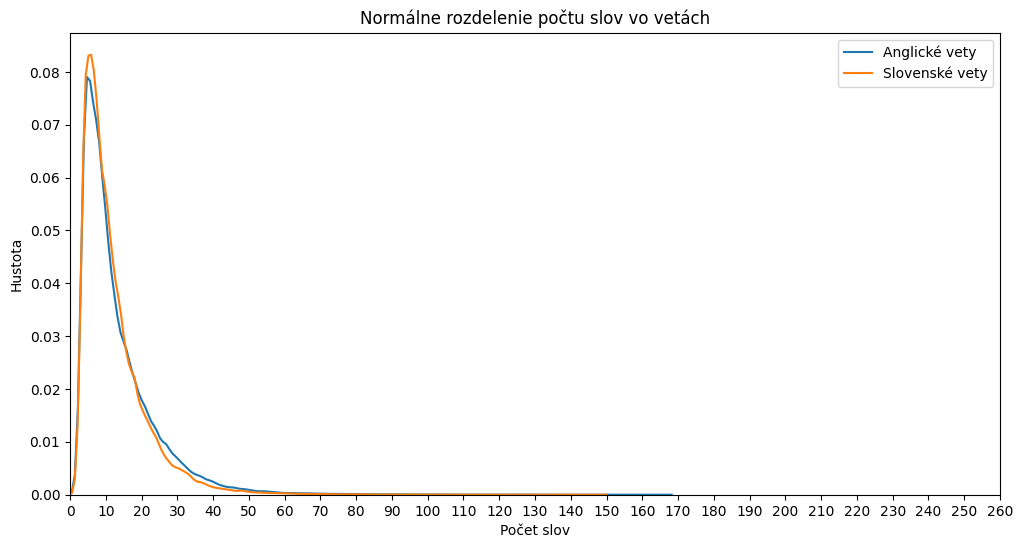

In [7]:
# Graf norm√°lneho rozdelenia poƒçtu slov viet anglick√©ho a slovensk√©ho textu
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(df['Source_pocet_slov'], ax=ax, label="Anglick√© vety")
sns.kdeplot(df['Target_pocet_slov'], ax=ax, label="Slovensk√© vety")

ax.set_xlim(0, 250)
ax.set_xticks(range(0, 261, 10))

ax.set_title("Norm√°lne rozdelenie poƒçtu slov vo vet√°ch")
ax.set_xlabel("Poƒçet slov")
ax.set_ylabel("Hustota")
ax.legend()

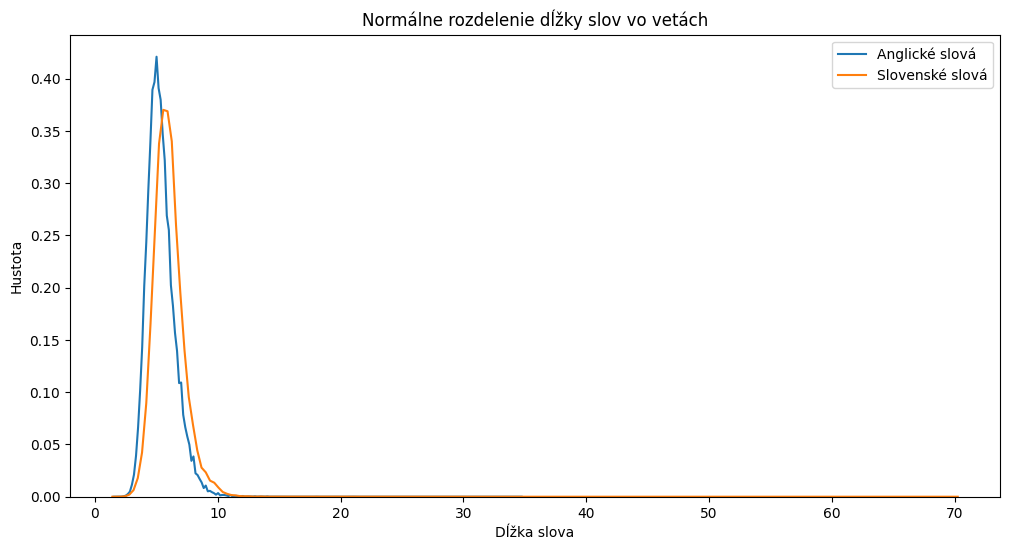

In [8]:
# Graf norm√°lneho rozdelenia dƒ∫≈æky viet slov  anglick√©ho a slovensk√©ho textu
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(df['Source_dlzka_slova'], ax=ax, label="Anglick√© slov√°")
sns.kdeplot(df['Target_dlzka_slova'], ax=ax, label="Slovensk√© slov√°")

ax.set_title("Norm√°lne rozdelenie dƒ∫≈æky slov vo vet√°ch")
ax.set_xlabel("Dƒ∫≈æka slova")
ax.set_ylabel("Hustota")
ax.legend()

## Hlavn√© ƒçistenie a √∫prava korpusu

In [9]:
start_time = time.time()

df_source = pd.read_csv(en_parl, names=['Source'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False) # dataset pre anglick√Ω text (source)
df_target = pd.read_csv(sk_parl, names=['Target'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False) # dataset pre slovensk√Ω text (target)
df = pd.concat([df_source, df_target], axis=1)
print("Rozmery datasetu (riadky, stƒ∫pce):", df.shape)


# Odstr√°nenie NaN hodn√¥t
pocet_riadkov = df.shape[0]
df = df.dropna()
odstranene_riadky = pocet_riadkov - df.shape[0]
print_status("Riadky bez NaN hodn√¥t\t\t\t\t\t        ", df.shape[0], odstranene_riadky, time.time() - start_time)


# Zmeny niektor√Ωch znakov, na z√°klade zisten√≠ pomocou unicode normaliz√°cie NFKC
pocet_riadkov = df.shape[0]

original_source = df['Source'] # bud√∫ca referencia ako poƒçet zmenen√Ωch znakov
original_target = df["Target"] # bud√∫ca referencia ako poƒçet zmenen√Ωch znakov

# Odstr√°nenie exponentov, ktor√© nie s√∫ veƒèla ƒç√≠sel (v√§ƒç≈°inou sa jedn√° o exponenty, ktor√© referuj√∫ na zdroj, ƒço nie je ≈æiad√∫ce v na≈°om modely) a z√°rove≈à s√∫ dan√© slov√° dlh≈°ie ako 3, aby sme omylom nevymazali znak pre miery ako napr√≠klad km, m atƒè.
df['Source'] = df['Source'].str.replace(r'(\b\w{4,})\s*([¬π¬≤¬≥‚Å¥‚Åµ‚Å∂‚Å∑‚Å∏‚Åπ‚Å∞]+)', r'\1', regex=True)
df['Target'] = df['Target'].str.replace(r'(\b\w{4,})\s*([¬π¬≤¬≥‚Å¥‚Åµ‚Å∂‚Å∑‚Å∏‚Åπ‚Å∞]+)', r'\1', regex=True)

# Transform√°cia ¬∫ (U+00BA) a Àö (U+02DA) na  Ãä (U+030A) pre zjednotenie znaku stup≈àa
df['Source'] = df['Source'].str.replace('\u00BA', '\u030A')
df['Target'] = df['Target'].str.replace('\u00BA', '\u030A')
df['Source'] = df['Source'].str.replace('\u02DA', '\u030A')
df['Target'] = df['Target'].str.replace('\u02DA', '\u030A')

# Transform√°cia ¬Ω (U+00BD) na ,5
df['Source'] = df['Source'].str.replace('\u00BD', ',5')
df['Target'] = df['Target'].str.replace('\u00BD', ',5')

# Porovnanie p√¥vodn√Ωch a normalizovan√Ωch hodn√¥t ako re≈•azcov a spoƒç√≠tanie zmenen√Ωch riadkov
source_sum = (original_source != df['Source']).sum()
target_sum = (original_target != df['Target']).sum()

prejdeny_cas = time.time() - start_time
print(f"\nNormaliz√°cia na z√°klade UNICODE znakov\t\t\t         Riadky: {df.shape[0]} | Poƒçet zmenen√Ωch riadkov v source (ANG): {source_sum} | Poƒçet zmenen√Ωch riadkov v target (SK): {target_sum} | ƒåas: {prejdeny_cas:.2f} sek√∫nd")


# Odstr√°nenie riadkov kde sa riadok source rovn√° riadku target
pocet_riadkov = df.shape[0]
df = df[df['Source'] != df['Target']]
odstranene_riadky = pocet_riadkov - df.shape[0]
print_status("Odstr√°nenie riadkov, kde sa riadok source rovn√° riadku target\t", df.shape[0], odstranene_riadky, time.time() - start_time)


# Odstr√°nenie duplik√°tov
pocet_riadkov = df.shape[0]
df = df.drop_duplicates()
odstranene_riadky = pocet_riadkov - df.shape[0]
print_status("Odstr√°nenie duplicitn√Ωch/rovnak√Ωch riadkov\t\t\t", df.shape[0], odstranene_riadky, time.time() - start_time)


# Odstr√°nenie v d√¥sledku pr√≠li≈° dlh√Ωch viet source/target
# Dƒ∫≈æka, ktor√° sa pova≈æuje za "pr√≠li≈° dlh√∫" z√°le≈æ√≠ od jazyka
pocet_riadkov = df.shape[0]
max_sentence_length = 175
df = df[~((df['Source'].str.count(' ') > max_sentence_length) | (df['Target'].str.count(' ') > max_sentence_length))]
odstranene_riadky = pocet_riadkov - df.shape[0]
print_status("Odstr√°nenie pr√≠li≈° dlh√Ωch viet source/target\t\t        ", df.shape[0], odstranene_riadky, time.time() - start_time)

# Odstr√°nenie stopwords
#stop_words_en = STOP_WORDS_EN
#stop_words_sk = STOP_WORDS_SK
#df['Source'] = df['Source'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words_en]))
#df['Target'] = df['Target'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words_sk]))
#odstranene_riadky = 0
#print_status("Odstr√°nenie stopwords\t\t\t\t\t        ", df.shape[0], odstranene_riadky, time.time() - start_time)

# Stemming
#stemmer = PorterStemmer()
#df['Source'] = df['Source'].apply(lambda x: ' '.join([stemmer.stem(w) for w in x.split()]))
#df['Target'] = df['Target'].apply(lambda x: ' '.join([stemmer.stem(w) for w in x.split()]))
#print_status("Stemming\t\t\t\t\t\t\t        ", df.shape[0], odstranene_riadky, time.time() - start_time)

# konverzia ≈°peci√°lnych znakov
pocet_riadkov = df.shape[0]

df['Source'] = df['Source'].str.replace(r'&amp;', '&', regex=True)
df['Source'] = df['Source'].str.replace(r'&quot;', '"', regex=True)
df['Source'] = df['Source'].str.replace(r'&apos;', '\'', regex=True)
df['Source'] = df['Source'].str.replace(r'&lt;', '<', regex=True)
df['Source'] = df['Source'].str.replace(r'&gt;', '>', regex=True)

df['Target'] = df['Target'].str.replace(r'&amp;', '&', regex=True)
df['Target'] = df['Target'].str.replace(r'&quot;', '"', regex=True)
df['Target'] = df['Target'].str.replace(r'&apos;', '\'', regex=True)
df['Target'] = df['Target'].str.replace(r'&lt;', '<', regex=True)
df['Target'] = df['Target'].str.replace(r'&gt;', '>', regex=True)
print_status("Konverzia ≈°peci√°lnych znakov\t\t\t        	", df.shape[0], odstranene_riadky, time.time() - start_time)

# Odstr√°nenie znakov, ktor√© nie s√∫ p√≠smen√°/ƒç√≠sla
df['Source'] = df['Source'].str.replace('[^\w\s]', '', regex=True)
df['Target'] = df['Target'].str.replace('[^\w\s]', '', regex=True)
odstranene_riadky = pocet_riadkov - df.shape[0]
print_status("Odstr√°nenie znakov, ktor√© nie s√∫ p√≠smen√°/ƒç√≠sla\t\t\t", df.shape[0], odstranene_riadky, time.time() - start_time)

# konverzia na mal√© p√≠smen√°
pocet_riadkov = df.shape[0]
df['Source'] = df['Source'].str.lower()
df['Target'] = df['Target'].str.lower()
prejdeny_cas = time.time() - start_time
odstranene_riadky = pocet_riadkov - df.shape[0] # tu je to len, aby to pasovalo pre funkciu print_status
print_status("Riadky s√∫ konvertovan√© na mal√© p√≠smen√° (lowercase)\t\t", df.shape[0], odstranene_riadky, time.time() - start_time)


# Nahradenie pr√°zdnych riadkov NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# Dodatoƒçn√© odstr√°nenie riadkov, kde je NaN, ktor√© mohli vznikn√∫≈• v d√¥sledku minul√Ωch krokov
pocet_riadkov = df.shape[0]
df = df.dropna()
odstranene_riadky = pocet_riadkov - df.shape[0]
print_status("Riadky bez NaN hodn√¥t\t\t\t\t\t        ", df.shape[0], odstranene_riadky, time.time() - start_time)

# kontrola jazyka - tento proces trv√° najdlh≈°ie
def safe_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return None

pocet_riadkov = df.shape[0]
df['source_jazyk'] = df['Source'].apply(lambda x: safe_detect(x) if x and len(x.split()) > 1 else None)
df['target_jazyk'] = df['Target'].apply(lambda x: safe_detect(x) if x and len(x.split()) > 1 else None)

df = df[(df['source_jazyk'] == "en") & (df['target_jazyk'] == "sk")]
df.drop(columns=['source_jazyk', 'target_jazyk'], inplace=True)
odstranene_riadky = pocet_riadkov - df.shape[0]
print_status("Kontrola jazykov\t\t\t\t\t        ", df.shape[0], odstranene_riadky, time.time() - start_time)


# Zmenenie poradia riadkov
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # pridanie random_state, aby sme dostali v≈ædy rovnako zamie≈°an√Ω dataset
print("Prehodenie poradia riadkov\t\t\t\t\t Riadky:", df.shape[0])

prejdeny_cas = time.time() - start_time
print(f"Celkov√Ω prejden√Ω ƒças: {prejdeny_cas:.2f} sek√∫nd")

source_subor = en_parl+'-filtered.'+ "en"
target_subor = sk_parl+'-filtered.'+ "sk"

df_source_en = df["Source"]
df_target_sk = df["Target"]

df_source_en.to_csv(source_subor, header=False, index=False, quoting=csv.QUOTE_NONE, sep="\n")
print("Source s√∫bor ulo≈æen√Ω:", source_subor)
df_target_sk.to_csv(target_subor, header=False, index=False, quoting=csv.QUOTE_NONE, sep="\n")
print("Target s√∫bor ulo≈æen√Ω:", target_subor)

Rozmery datasetu (riadky, stƒ∫pce): (640715, 2)
Riadky bez NaN hodn√¥t					         Riadky: 640703 | Odstr√°nen√© riadky: 12, ƒåas: 3.61 sek√∫nd

Normaliz√°cia na z√°klade UNICODE znakov			         Riadky: 640703 | Poƒçet zmenen√Ωch riadkov v source (ANG): 109 | Poƒçet zmenen√Ωch riadkov v target (SK): 116 | ƒåas: 15.58 sek√∫nd
Odstr√°nenie riadkov, kde sa riadok source rovn√° riadku target	 Riadky: 640703 | Odstr√°nen√© riadky: 0, ƒåas: 15.85 sek√∫nd
Odstr√°nenie duplicitn√Ωch/rovnak√Ωch riadkov			 Riadky: 640703 | Odstr√°nen√© riadky: 0, ƒåas: 16.80 sek√∫nd
Odstr√°nenie pr√≠li≈° dlh√Ωch viet source/target		         Riadky: 640703 | Odstr√°nen√© riadky: 0, ƒåas: 19.01 sek√∫nd
Konverzia ≈°peci√°lnych znakov			        	 Riadky: 640703 | Odstr√°nen√© riadky: 0, ƒåas: 23.52 sek√∫nd
Odstr√°nenie znakov, ktor√© nie s√∫ p√≠smen√°/ƒç√≠sla			 Riadky: 640703 | Odstr√°nen√© riadky: 0, ƒåas: 27.52 sek√∫nd
Riadky s√∫ konvertovan√© na mal√© p√≠smen√° (lowercase)		 Riadky: 640703 | Odstr√°nen√© riad

<ipython-input-9-d099b0d64cc2>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['source_jazyk', 'target_jazyk'], inplace=True)


Kontrola jazykov					         Riadky: 512232 | Odstr√°nen√© riadky: 128471, ƒåas: 10207.57 sek√∫nd
Prehodenie poradia riadkov					 Riadky: 512232
Celkov√Ω prejden√Ω ƒças: 10207.77 sek√∫nd
Source s√∫bor ulo≈æen√Ω: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en-filtered.en
Target s√∫bor ulo≈æen√Ω: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.sk-filtered.sk


# Subwording

In [7]:
#en_filt = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/europarl.sk-en.en-filtered.en"
#sk_filt = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/europarl.sk-en.sk-filtered.sk"

en_filt = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en-filtered.en"
sk_filt = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.sk-filtered.sk"

In [8]:
#https://github.com/google/sentencepiece


#Parametre
vocab_size = 8000
character_coverage = 0.9995

# pre pr√≠pad veƒæk√Ωch korpusov -> --train_extremely_large_corpus=false

# Model pre subwordovanie anglick√©ho textu (source)
source = f'--input={en_filt} --model_prefix=source --vocab_size={vocab_size} --hard_vocab_limit=false --character_coverage={character_coverage} --split_digits=true --model_type=bpe'
spm.SentencePieceTrainer.train(source)
print("Tr√©novanie SentencePiece modelu bolo pre source s√∫bor dokonƒçen√©")


# Model pre subwordovanie slovensk√©ho textu (target)
target = f'--input={sk_filt} --model_prefix=target --vocab_size={vocab_size} --hard_vocab_limit=false --character_coverage={character_coverage} --split_digits=true --model_type=bpe'
spm.SentencePieceTrainer.train(target)
print("Tr√©novanie SentencePiece modelu bolo pre target s√∫bor dokonƒçen√©")

Tr√©novanie SentencePiece modelu bolo pre source s√∫bor dokonƒçen√©
Tr√©novanie SentencePiece modelu bolo pre target s√∫bor dokonƒçen√©


In [9]:
source_model = r"/content/source.model"
target_model = r"/content/target.model"
#source_subworded = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/source_subworded"
#target_subworded = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded"

source_subworded = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/source_subworded"
target_subworded = "/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded"

In [10]:
def subwordovanie(sp, vstup, vystup, interval=100000):
    try:
        with open(vstup, encoding="utf-8") as vstup, open(vystup, "w+", encoding="utf-8") as vystup:
            for i, line in enumerate(vstup):
                line = line.strip()
                tokens = sp.encode_as_pieces(line)
                vystup.write(" ".join(tokens) + "\n")

                if (i + 1) % interval == 0:
                    print(f"Spracovan√Ωch {i + 1} riadkov v {vstup}")
    except Exception as e:
        print(f"Nastala chyba v procese {vstup}: {e}")

sp = spm.SentencePieceProcessor()

sp.load(source_model)
subwordovanie(sp, en_filt, source_subworded)
print(f"Subwordovanie Source s√∫boru bolo dokonƒçen√©: {source_subworded}")

sp.load(target_model)
subwordovanie(sp, sk_filt, target_subworded)
print(f"Subwordovanie Target s√∫boru bolo dokonƒçen√©: {target_subworded}")

Spracovan√Ωch 100000 riadkov v <_io.TextIOWrapper name='/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en-filtered.en' mode='r' encoding='utf-8'>
Spracovan√Ωch 200000 riadkov v <_io.TextIOWrapper name='/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en-filtered.en' mode='r' encoding='utf-8'>
Spracovan√Ωch 300000 riadkov v <_io.TextIOWrapper name='/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en-filtered.en' mode='r' encoding='utf-8'>
Spracovan√Ωch 400000 riadkov v <_io.TextIOWrapper name='/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en-filtered.en' mode='r' encoding='utf-8'>
Spracovan√Ωch 500000 riadkov v <_io.TextIOWrapper name='/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/ParaCrawl.en-filtered.en' mode='r' encoding='utf-8'>
Subwordovanie Source s√∫boru bolo dokonƒçen√©: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/source

## V√Ωpis riadkov s√∫boru

In [11]:
with open(source_subworded, "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i >= 5:
            break

print()

with open(target_subworded, "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i >= 5:
            break

‚ñÅfor ‚ñÅa ‚ñÅmore ‚ñÅdetailed ‚ñÅtechnical ‚ñÅwalk th rough ‚ñÅof ‚ñÅcreating ‚ñÅa ‚ñÅweb h ook ‚ñÅsee ‚ñÅout going ‚ñÅweb h ook s ‚ñÅin ‚ñÅmicrosoft ‚ñÅteams
‚ñÅholiday ‚ñÅhouses ‚ñÅski ‚ñÅresorts ‚ñÅbos nia ‚ñÅand ‚ñÅher ze g ov ina
‚ñÅgoogle ‚ñÅanalytics ‚ñÅuses ‚ñÅsocalled ‚ñÅcookies ‚ñÅie ‚ñÅtext ‚ñÅfiles ‚ñÅthat ‚ñÅare ‚ñÅstored ‚ñÅon ‚ñÅyour ‚ñÅcomputer ‚ñÅand ‚ñÅthat ‚ñÅallow ‚ñÅan ‚ñÅanalysis ‚ñÅof ‚ñÅthe ‚ñÅuse ‚ñÅof ‚ñÅthe ‚ñÅwebsite ‚ñÅby ‚ñÅyou
‚ñÅecb ‚ñÅopinion ‚ñÅon ‚ñÅstatistical ‚ñÅreporting ‚ñÅrequirements ‚ñÅin ‚ñÅthe ‚ñÅfield ‚ñÅof ‚ñÅpayment ‚ñÅstatistics ‚ñÅin ‚ñÅpoland
‚ñÅwr ink le ‚ñÅfans ‚ñÅand ‚ñÅfat ‚ñÅv es icles ‚ñÅp us hing ‚ñÅfrom ‚ñÅthe ‚ñÅbottom ‚ñÅare ‚ñÅremoved ‚ñÅfrom ‚ñÅthe ‚ñÅbottom ‚ñÅey el ids ‚ñÅwhere ‚ñÅthese ‚ñÅcause ‚ñÅbul ging ‚ñÅand ‚ñÅchange ‚ñÅin ‚ñÅthe ‚ñÅshape ‚ñÅof ‚ñÅthe ‚ñÅface
‚ñÅno ‚ñÅsqu eal ing ‚ñÅits ‚ñÅhard ‚ñÅto ‚ñÅbreak ‚ñÅtra ction

‚ñÅpodrob nej≈°ie ‚ñÅtechnick√© ‚ñÅrie≈°enie ‚ñÅvytv√° rania ‚ñÅweb ho ok ‚ñÅn√°jdete ‚ñÅv ‚

# Rozdelenie d√°t na mno≈æiny

D√°ta rozdelujeme do 3 ƒçast√≠:

    tr√©novac√≠ dataset - pou≈æ√≠va sa na tr√©novanie modelu;
    development dataset - pou≈æ√≠va sa na valid√°ciu modelu poƒças tr√©novania, aby sa mohli vylep≈°i≈• parametre modelu
    testovac√≠ dataset - pou≈æ√≠va sa na koneƒçn√© vyhodotenie (evalu√°ciu) modelu na modelom neviden√Ωch d√°tach

In [12]:
# source_subor = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/source_subworded"
# target_subor = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded"


source_subor = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/source_subworded"
target_subor = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded"

In [13]:
np.random.seed(42)


# Veƒækos≈• s√∫borov pre dev a test text
data_size = 4000

development = data_size
test = data_size


def train_test_dev(development, test, source_subor, target_subor):
    df_source = pd.read_csv(source_subor, names=['Source'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False, encoding="utf-8")
    df_target = pd.read_csv(target_subor, names=['Target'], sep="\0", quoting=csv.QUOTE_NONE, skip_blank_lines=False, encoding="utf-8")
    df = pd.concat([df_source, df_target], axis=1)

    # Odstr√°nenie pr√°zdnych riadkov
    df.dropna(inplace=True)

    # Zamie≈°anie datasetu
    df = df.sample(frac=1, random_state=42).reset_index(drop=True) # pridanie random_state, aby sme dostali v≈ædy rovnako zamie≈°an√Ω dataset

    # Rozdelenie datasetu
    df_dev = df[:development]
    df_test = df[development:development + test]
    df_train = df[development + test:]

    def vytvorenie_suboru(df, source_subor, target_subor):
        df['Source'].to_csv(source_subor, index=False, header=False, quoting=csv.QUOTE_NONE, sep=',')
        df['Target'].to_csv(target_subor, index=False, header=False, quoting=csv.QUOTE_NONE, sep=',')


    vytvorenie_suboru(df_train, source_subor + '.train', target_subor + '.train')
    vytvorenie_suboru(df_dev, source_subor + '.dev', target_subor + '.dev')
    vytvorenie_suboru(df_test, source_subor + '.test', target_subor + '.test')


train_test_dev(development, test, source_subor, target_subor)


In [14]:
#source_test = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/source_subworded.test"
#target_test = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded.test"

source_test = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/source_subworded.test"
target_test = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded.test"

In [15]:
with open(source_test, "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i >= 5:
            break

print()

with open(target_test, "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i >= 5:
            break

‚ñÅch ich inal es ‚ñÅcurrent ‚ñÅweather ‚ñÅconditions
‚ñÅdoes ‚ñÅn ed is ‚ñÅoffer ‚ñÅdiscounts
‚ñÅwednesday ‚ñÅaugust ‚ñÅ 3 0 ‚ñÅ 2 0 1 7 ‚ñÅin ‚ñÅfair wood ‚ñÅthe ‚ñÅweather ‚ñÅforecast ‚ñÅwould ‚ñÅbe
‚ñÅk im ek on i ‚ñÅcurrent ‚ñÅweather ‚ñÅconditions
‚ñÅthere ‚ñÅare ‚ñÅsome ‚ñÅshops ‚ñÅrestaurants ‚ñÅa ‚ñÅsuper mark et ‚ñÅand ‚ñÅa ‚ñÅboat ‚ñÅharbour ‚ñÅthere
‚ñÅhome ‚ñÅplan ‚ñÅyour ‚ñÅtrip ‚ñÅhow ‚ñÅto ‚ñÅar rive ‚ñÅby ‚ñÅtrain

‚ñÅch ich ina les ‚ñÅaktu√°lne ‚ñÅpoveternostn√© ‚ñÅpodmienky
‚ñÅpon√∫ka ‚ñÅspoloƒçnos≈• ‚ñÅnedis ‚ñÅzƒæavy
‚ñÅstreda ‚ñÅ 6 ‚ñÅseptembra ‚ñÅ 2 0 1 7 ‚ñÅv ‚ñÅspo k ane ‚ñÅpoƒçasie ‚ñÅbude
‚ñÅba mba din ga ‚ñÅaktu√°lne ‚ñÅpoveternostn√© ‚ñÅpodmienky
‚ñÅs√∫ ‚ñÅtu ‚ñÅobcho dy ‚ñÅre≈°taur√°cie ‚ñÅsuper mar ket ‚ñÅa ‚ñÅlo dn√Ω ‚ñÅpr√≠stav
‚ñÅhome ‚ñÅnap ro gra mu j ‚ñÅsi ‚ñÅcestu ‚ñÅako ‚ñÅprice st ova≈• ‚ñÅvla kom


# Vytvorenie konfigur√°cie a tr√©novanie modelu

In [19]:
config = '''

seed: 42 # aby sme dosiahli rovnak√Ωch v√Ωsledkov a pre lep≈°ie porovn√°vanie medzi modelmi

save_data: vocab  # zlo≈æka, kde sa ulo≈æ√≠ slovn√° z√°soba vygenerovan√° pomocou onmt_build_vocab

data:
    corpus:
        # s√∫bory urƒçen√© na tr√©novanie
        #path_src: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/source_subworded.train
        #path_tgt: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded.train

        path_src: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/source_subworded.train
        path_tgt: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded.train
        transforms: [filtertoolong]
        weight: 1
    valid:
        # s√∫bory urƒçen√© na valid√°ciu
        #path_src: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/source_subworded.dev
        #path_tgt: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded.dev

        path_src: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/source_subworded.dev
        path_tgt: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded.dev
        transforms: [filtertoolong]

# s√∫bory, v ktor√Ωch je ulo≈æen√° slovn√° z√°soba pre source (anglick√Ω jazyk) a target (slovensk√Ω jazyk) onmt_build_vocab
src_vocab: vocab/source.vocab
tgt_vocab: vocab/target.vocab

# veƒækos≈• slovnej z√°soby - hodnoty by mali by≈• rovnak√© ako v sentencepiece
src_vocab_size: 8000
tgt_vocab_size: 8000

src_subword_model: /content/source.model
tgt_subword_model: /content/target.model

# Miesto ulo≈æenia s√∫borov
#log_file:   /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/train.log
#save_model: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/complete_model

save_model: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/complete_model

train_steps: 100000 # poƒçet krokov tr√©novania
valid_steps: 10000  # po n krokoch vykona≈• valid√°ciu pomocou dev setu
warmup_steps: 8000 # poƒçet by mal by≈• priamo√∫mern√Ω poƒçtu krokov tr√©novania
early_stopping: 4 # ak sa model nezlep≈°√≠ po n valid√°ciach, tr√©novanie zastav√≠
save_checkpoint_steps: 5000   # ulo≈æenie modelu po n krokoch
keep_checkpoint: 10  # poƒçet posledn√Ωch n ulo≈æen√Ωch modelov
report_every: 500 # v√Ωpis inform√°ci√≠ o tr√©novan√≠ po n-krokoch

decoder_type: transformer
encoder_type: transformer
word_vec_size: 512   # dimenzion√°lnos≈• word embeddingu
hidden_size: 512     # dimenzion√°lnos≈• skryt√Ωch stavov v enk√≥dery a dek√≥dery
layers: 6             # poƒçet vrstiev v enk√≥dery a dek√≥dery   - alternat√≠va je enc_layers a dec_layers
transformer_ff: 2048  # dimenzion√°lnos≈• doprednej vrstvy v transformery
heads: 8              # poƒçet attention head v multi-head-attention

accum_count: 2 # poƒçet n krokov, po ktor√Ωch sa aktualizuj√∫ parametre
optim: adam
adam_beta1: 0.9
adam_beta2: 0.998
decay_method: noam
learning_rate: 2.0    # miera uƒçenia
max_grad_norm: 1.0    # gradient clipping, pom√°ha, aby v modely nenastal exploduj√∫ci gradient (nemo≈ænos≈• modelu sa uƒçi≈• v d√¥sledku vysokej miery uƒçenia), em√¥≈æe pom√¥c≈• pre lep≈°iu stabilitu modelu

param_init: 0.0
param_init_glorot: 'true'
position_encoding: 'true'

batch_size: 1024
valid_batch_size: 1024
batch_type: tokens
normalization: tokens
max_generator_batches: 2

dropout: 0.1           # regulariz√°cia, ktor√° vytv√°ra ≈°ancu (0.1 = 10%) na "vypnutie" nodu vo vrstve behom tr√©novania, pom√°ha proti overfittingu
label_smoothing: 0.1

world_size: 1
gpu_ranks: 0

# INFO
log_file: train.log
log_level: INFO

'''

with open("config.yaml", "w+", encoding="utf-8") as config_yaml:
  config_yaml.write(config)

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2ad78e68-7908-2501-57d8-2e092505cd05)


Pou≈æ√≠jeme Framework OpenNMT

In [22]:
# Vytvorenie vocabulary
!onmt_build_vocab -config config.yaml -n_sample -1

[2024-03-07 13:24:51,237 INFO] Counter vocab from -1 samples.
[2024-03-07 13:24:51,237 INFO] n_sample=-1: Build vocab on full datasets.
[2024-03-07 13:25:10,947 INFO] * Transform statistics for corpus(100.00%):
			* FilterTooLongStats(filtered=159)

[2024-03-07 13:25:10,970 INFO] Counters src: 8372
[2024-03-07 13:25:10,970 INFO] Counters tgt: 8210


In [23]:
# Tr√©novanie the NMT model
!onmt_train -config config.yaml -gpu_ranks 0

[2024-03-07 13:25:18,236 INFO] Parsed 2 corpora from -data.
[2024-03-07 13:25:18,236 INFO] Get special vocabs from Transforms: {'src': [], 'tgt': []}.
[2024-03-07 13:25:18,266 INFO] The first 10 tokens of the vocabs are:['<unk>', '<blank>', '<s>', '</s>', '‚ñÅthe', '‚ñÅ', '‚ñÅand', '‚ñÅof', '‚ñÅto', '‚ñÅin']
[2024-03-07 13:25:18,267 INFO] The decoder start token is: <s>
[2024-03-07 13:25:18,267 INFO] Building model...
[2024-03-07 13:25:18,747 INFO] Switching model to float32 for amp/apex_amp
[2024-03-07 13:25:18,747 INFO] Non quantized layer compute is fp32
[2024-03-07 13:25:19,034 INFO] NMTModel(
  (encoder): TransformerEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(8000, 512, padding_idx=1)
        )
        (pe): PositionalEncoding()
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiHeadedA

# Preklad

In [24]:
config_translate = '''

#model: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/complete_model_step_100000.pt     # sem vlo≈æi≈• najlep≈°√≠ model tr√©novania
#src: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/source_subworded.test
#output: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/translated

model: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/complete_model_step_100000.pt     # sem vlo≈æi≈• najlep≈°√≠ model tr√©novania
src: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/source_subworded.test
output: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/translated

log_file: translate.log

seed: 42

beam_size: 4
min_length: 1
length_penalty: avg

batch_size: 32
gpu: 0

coverage_penalty: summary
beta: 0.5

'''

with open("config_translated.yaml", "w+", encoding="utf-8") as config_yaml:
  config_yaml.write(config_translate)

In [25]:
# Preklad
!onmt_translate -config config_translated.yaml

[2024-03-07 19:13:33,383 INFO] Loading checkpoint from /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/complete_model_step_100000.pt
[2024-03-07 19:13:34,295 INFO] Loading data into the model
[2024-03-07 19:14:10,232 INFO] PRED SCORE: -5.2618, PRED PPL: 192.82 NB SENTENCES: 4000
Time w/o python interpreter load/terminate:  36.87502574920654


In [26]:
#translated = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/translated"
translated = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/translated"
with open(translated, "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i >= 5:
            break

print()

‚ñÅch ich ina les ‚ñÅaktu√°lne ‚ñÅpoveternostn√© ‚ñÅpodmienky
‚ñÅpon√∫ka ‚ñÅzƒæavy
‚ñÅstreda ‚ñÅ 3 0 ‚ñÅaugust ‚ñÅ 2 0 1 7 ‚ñÅv ‚ñÅfa ir wood ‚ñÅpoƒçasie ‚ñÅbude
‚ñÅki me ko ni ‚ñÅaktu√°lne ‚ñÅpoveternostn√© ‚ñÅpodmienky
‚ñÅv ‚ñÅhoteli ‚ñÅn√°jdete ‚ñÅobcho dy ‚ñÅre≈°taur√°cie ‚ñÅsuper mar ket ‚ñÅa ‚ñÅloƒè
‚ñÅhome ‚ñÅnap l√° nu jte ‚ñÅsi ‚ñÅcestu ‚ñÅako ‚ñÅsa ‚ñÅdosta≈• ‚ñÅvla kom



In [27]:
target_model = r"/content/target.model"
#translation = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/translated"
translation = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/translated"
translation_desubword = translation + ".desubword"

sp = spm.SentencePieceProcessor()
sp.load(target_model)

# Desubword prekladov√Ω s√∫bor
with open(translation, encoding='utf-8') as vstup, open(translation_desubword, "w", encoding='utf-8') as vystup:
    for line in vstup:
        desub = sp.decode_pieces(line.strip().split(" "))
        vystup.write(desub + "\n")

print(f"Dek√≥dovanie bolo dokonƒçen√©! V√Ωstupn√Ω s√∫bor: {translation_desubword}")

#target_test = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded.test"
target_test = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded.test"
target_test_desubword = target_test + ".desubword"

with open(target_test, encoding='utf-8') as vstup, open(target_test_desubword, "w", encoding='utf-8') as vystup:
    for line in vstup:
        desub = sp.decode_pieces(line.strip().split(" "))
        vystup.write(desub + "\n")

print(f"Dek√≥dovanie bolo dokonƒçen√©! V√Ωstupn√Ω s√∫bor: {target_test_desubword}")

Dek√≥dovanie bolo dokonƒçen√©! V√Ωstupn√Ω s√∫bor: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/translated.desubword
Dek√≥dovanie bolo dokonƒçen√©! V√Ωstupn√Ω s√∫bor: /content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded.test.desubword


In [28]:
#reference = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded.test.desubword"
#preklad = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/translated.desubword"

reference = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/target_subworded.test.desubword"
preklad = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/ParaCrawl/translated.desubword"

In [29]:
with open(reference, "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i >= 5:
            break

print()

chichinales aktu√°lne poveternostn√© podmienky
pon√∫ka spoloƒçnos≈• nedis zƒæavy
streda 6 septembra 2017 v spokane poƒçasie bude
bambadinga aktu√°lne poveternostn√© podmienky
s√∫ tu obchody re≈°taur√°cie supermarket a lodn√Ω pr√≠stav
home naprogramuj si cestu ako pricestova≈• vlakom



In [30]:
with open(preklad, "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i >= 5:
            break

print()

chichinales aktu√°lne poveternostn√© podmienky
pon√∫ka zƒæavy
streda 30 august 2017 v fairwood poƒçasie bude
kimekoni aktu√°lne poveternostn√© podmienky
v hoteli n√°jdete obchody re≈°taur√°cie supermarket a loƒè
home napl√°nujte si cestu ako sa dosta≈• vlakom



In [ ]:
#!pip install spacy

# Evalv√°cia

In [31]:
#!python -m spacy download en_core_web_sm
!python -m spacy download xx_ent_wiki_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.1/11.1 MB 88.8 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [32]:
import spacy
import sacrebleu
from nltk.translate import meteor_score as ms
import nltk
nltk.download('wordnet')

nlp = spacy.load("xx_ent_wiki_sm") #https://github.com/explosion/spacy-models/releases/tag/xx_ent_wiki_sm-3.7.0

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#reference = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/target_subworded.test.desubword"
#preklad = r"/content/drive/MyDrive/Colab_Notebooks/Diplomovka/DaÃÅta/europarl/translated.desubword"

In [33]:
# referenƒçn√© hodnoty
refs = []

with open(reference, encoding='utf-8') as reference:
    for line in reference:
        line = line.strip()
        refs.append(line)

print("Referenƒçn√° veta v SK jazyku:", refs[0]) # v√Ωpis prvej referenƒçenj vety, pomocou ktorej budeme porovn√°va≈• vety

refs = [refs]  # list listov, teda forma, ktor√∫ si vy≈æaduje SacreBLEU

# hodnoty, ktor√© sme prelo≈æili
preds = []

with open(preklad, encoding='utf-8') as prek:
    for line in prek:
        line = line.strip()
        preds.append(line)

print("Prelo≈æen√° veta:\t\t    ", preds[0]) # v√Ωpis prv√©ho prelo≈æen√©ho riadka

# BLEU sk√≥re - v√Ωpoƒçet BLEU na z√°klade porovnania referenƒçn√Ωch viet s prelo≈æen√Ωmi vetami
bleu = sacrebleu.corpus_bleu(preds, refs)
print("BLEU:  ", bleu.score)

# tokeniz√°cia je potrebn√° pre rozdelenie viet do men≈°√≠ch ƒçast√≠ (tokenov), aby Meteor dok√°zal porovn√°va≈• slov√° a ich v√Ωznam
def tokenizacia(text):
    doc = nlp(text)
    return [token.text for token in doc]

meteor_scores = []
for refs_segment, pred in zip(refs, preds):
    ref = refs_segment[0]
    token_ref = tokenizacia(ref) # tokeniz√°cia referenƒçn√Ωch viet
    token_pred = tokenizacia(pred) # tokeniz√°ci prelo≈æen√Ωch viet

    # V√Ωpoƒçet METEOR sk√≥re - meteor sk√≥re narozdiel od bleu zohƒæadnuje s√©mantiku do istej miery
    score = ms.meteor_score([token_ref], token_pred) # v√Ωpoƒçet meteor sk√≥re pre jednu vetu
    meteor_scores.append(score)

average_meteor_score = sum(meteor_scores) / len(meteor_scores) # v√Ωpoƒçet priemeru Meteor sk√≥re, pre cel√∫ mno≈æinu prelo≈æen√Ωch viet
print("METEOR: ", average_meteor_score)

Referenƒçn√° veta v SK jazyku: chichinales aktu√°lne poveternostn√© podmienky
Prelo≈æen√° veta:		     chichinales aktu√°lne poveternostn√© podmienky
BLEU:   33.559299534790284
METEOR:  0.9921875


In [ ]:
token_ref

['po', 'prv√©', 'v', 'e√∫', 'je', 'nedostatok', 'org√°nov']

In [ ]:
token_pred

['po', 'prv√©', 'v', 'e√∫', 's√∫', 'k', 'dispoz√≠cii', 'nedostatoƒçn√©', 'org√°ny']

In [ ]:
from google.colab import runtime
runtime.unassign()